<a href="https://colab.research.google.com/github/fridymandita/TKB/blob/main/Data_Visualization_Seasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seasonal adjustment - COVID-19 cases

In [1]:
import pathlib

import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data


In [3]:
nytimes = pd.read_csv(
    'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv',
    index_col=['date'], parse_dates=['date']).asfreq(freq='D')

# Transform: add new columns with useful transformations
nytimes['new_cases'] = nytimes['cases'].diff()
nytimes['new_cases_ma7'] = nytimes['new_cases'].rolling(7).mean()

anomalous_dates = ['2020-09-21', '2020-11-26', '2020-12-11', '2020-12-25']
nytimes['anomaly'] = False
nytimes.loc[anomalous_dates, 'anomaly'] = True

# Load: save dataset as "us.parquet"
nytimes_path = pathlib.Path('./data/nytimes/')
nytimes_path.mkdir(parents=True, exist_ok=True)
nytimes.to_parquet(nytimes_path / 'us.parquet')

In [4]:
# Read the data from the Parquet file into a DataFrame
data = pd.read_parquet('./data/nytimes/us.parquet', columns=['new_cases'])

# Subset to the date range and column that we want
new_cases = data.loc['2020-04-01':, 'new_cases']

In [5]:
print(new_cases.index)

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', name='date', length=791, freq=None)


In [6]:
# Let Pandas know that our data is observed at a daily frequency
new_cases = new_cases.asfreq('D')

# Notice that now we have `freq='D'`
print(new_cases.index)

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
               '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', name='date', length=791, freq='D')


In [7]:
daysofweek = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}

**Plotting the data**

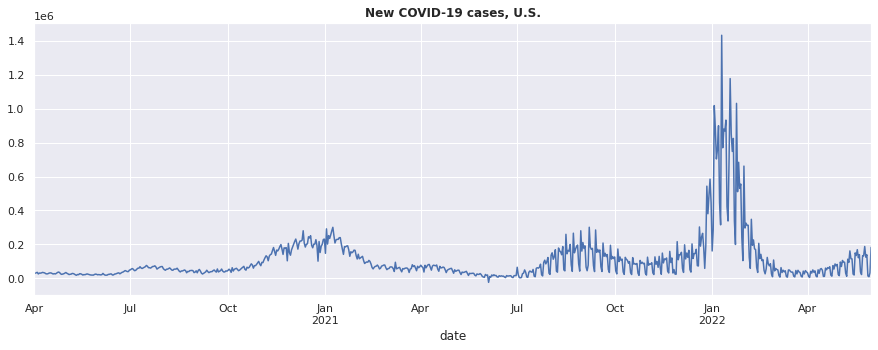

In [8]:
ax = new_cases.plot(figsize=(15, 5))
ax.set_title('New COVID-19 cases, U.S.', fontsize='large', fontweight='bold');

**Seasonality in the data**

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


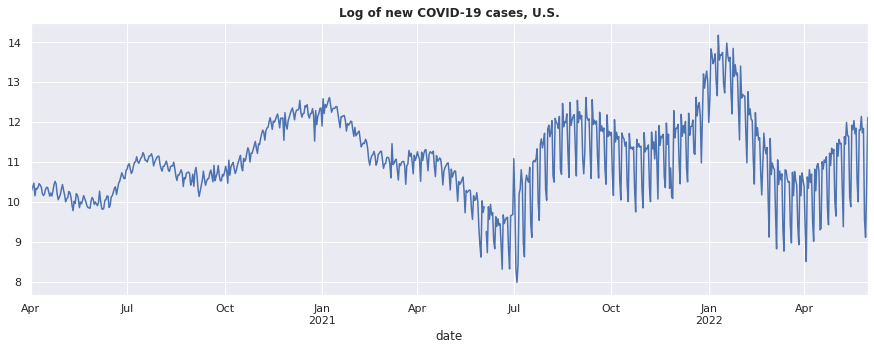

In [9]:
# Construct the log-transformed analysis dataset
log_new_cases = np.log(new_cases)

# Plot the transformed series to check if it has addressed our concern about changing seasonal factors
ax = log_new_cases.plot(figsize=(15, 5))
ax.set_title('Log of new COVID-19 cases, U.S.', fontsize='large', fontweight='bold');